In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers

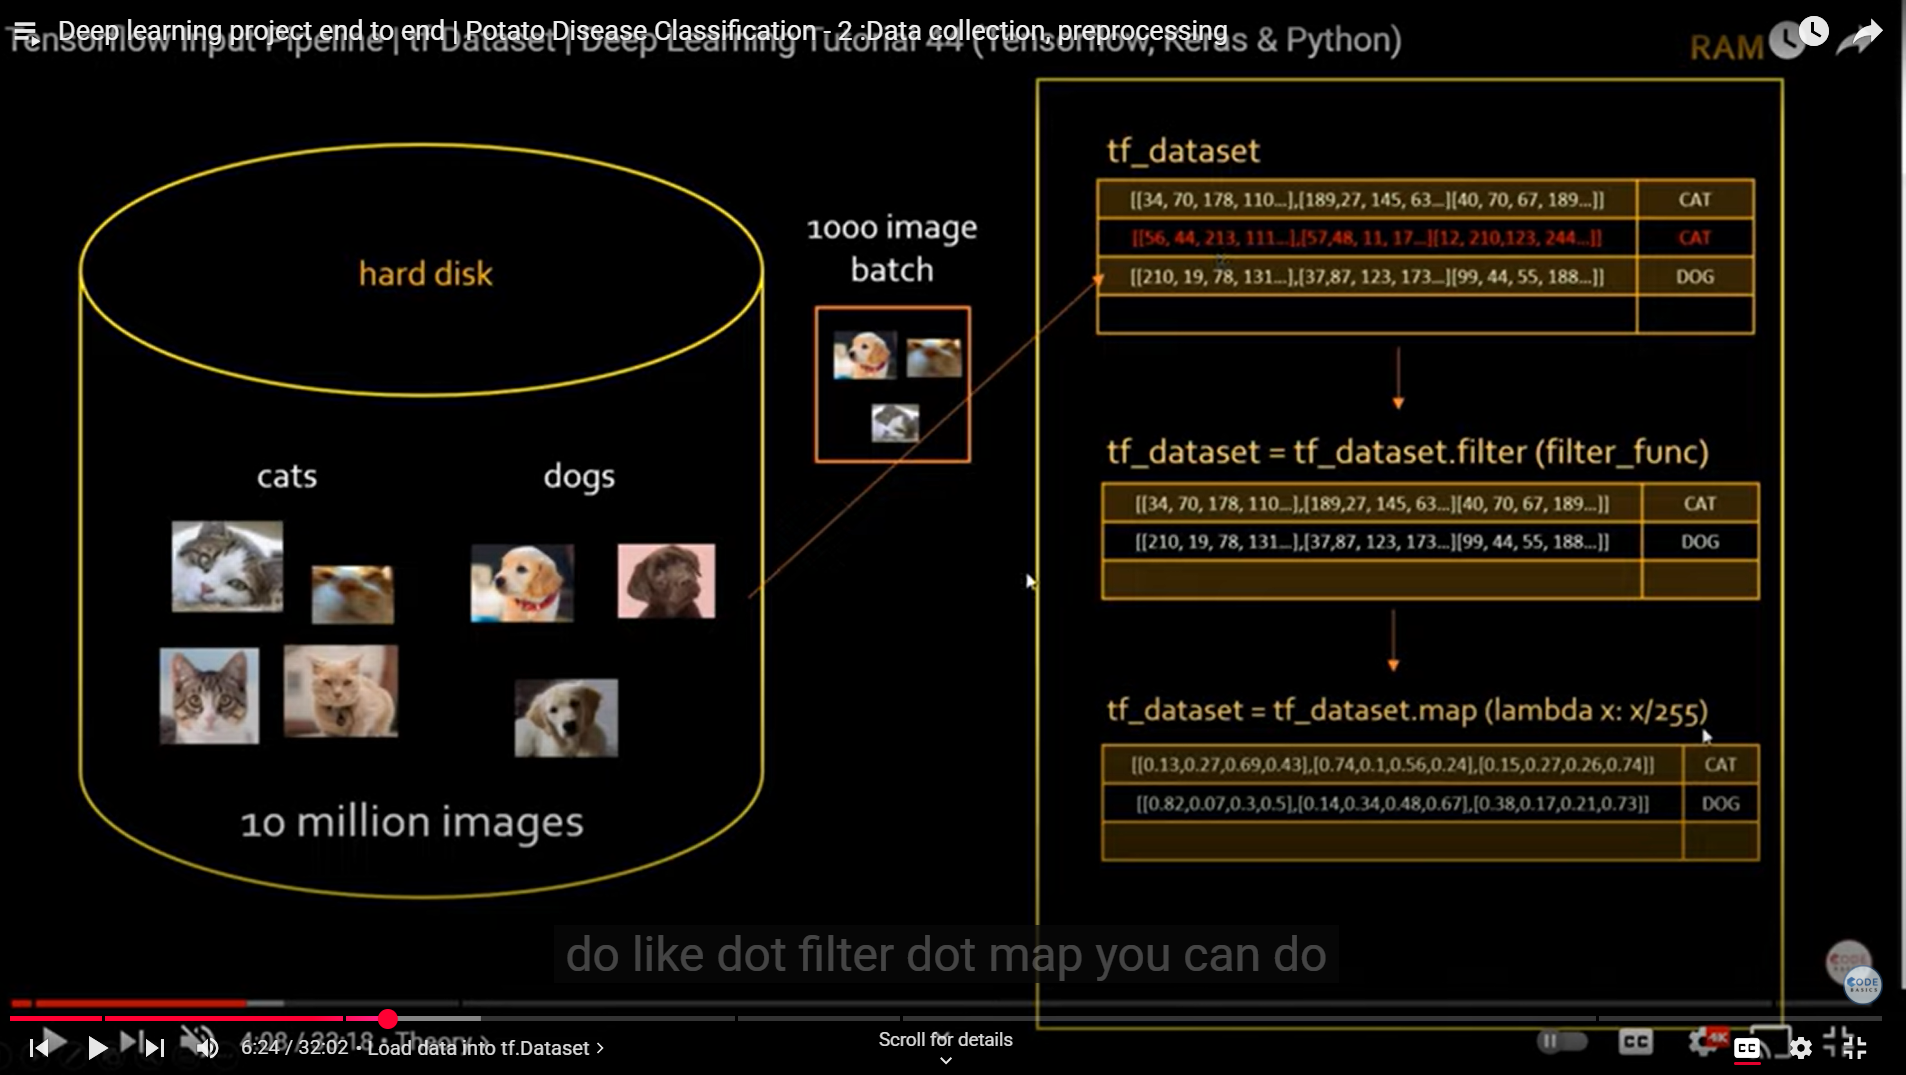

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


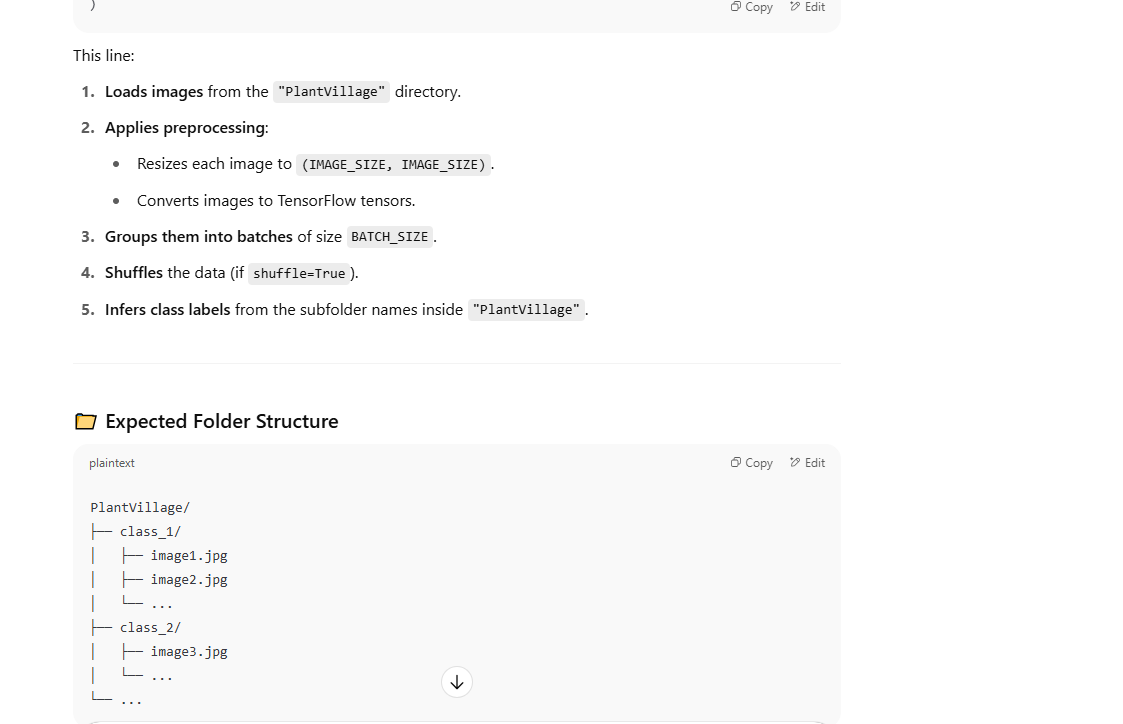

In [4]:
class_names=dataset.class_names # these are the folder names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
#each batch has 32 images, hence 32, 256x256 is img size, and 3 is for rgb, and in second one we convert tensor to numpy
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
#in the end what that is is a 32 numbers saying what type each leaf is in that batch, so 0->black rot, 1-> healthy like that according to the dir

(32, 256, 256, 3)
[0 0 0 1 0 1 1 1 1 1 1 0 0 2 0 2 0 0 1 2 1 0 1 1 0 1 1 2 0 1 0 1]


In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0]) #Printing only the first image

tf.Tensor(
[[[172. 174. 187.]
  [170. 172. 185.]
  [174. 176. 189.]
  ...
  [208. 207. 215.]
  [202. 201. 209.]
  [185. 184. 192.]]

 [[170. 172. 185.]
  [169. 171. 184.]
  [172. 174. 187.]
  ...
  [217. 216. 224.]
  [212. 211. 219.]
  [201. 200. 208.]]

 [[176. 178. 191.]
  [176. 178. 191.]
  [179. 181. 194.]
  ...
  [205. 204. 212.]
  [196. 195. 203.]
  [191. 190. 198.]]

 ...

 [[122. 116. 126.]
  [120. 114. 124.]
  [124. 118. 128.]
  ...
  [126. 120. 132.]
  [127. 121. 133.]
  [134. 128. 140.]]

 [[122. 116. 126.]
  [120. 114. 124.]
  [124. 118. 128.]
  ...
  [122. 116. 128.]
  [123. 117. 129.]
  [130. 124. 136.]]

 [[119. 113. 123.]
  [115. 109. 119.]
  [120. 114. 124.]
  ...
  [129. 123. 135.]
  [131. 125. 137.]
  [137. 131. 143.]]], shape=(256, 256, 3), dtype=float32)


In [8]:
#converting tensor to numpy
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
    print(image_batch[0].numpy()) #Printing only the first image &converting to numpy

(256, 256, 3)
[[[105. 107. 120.]
  [ 84.  86.  99.]
  [ 94.  96. 109.]
  ...
  [125. 126. 144.]
  [126. 127. 145.]
  [128. 129. 147.]]

 [[118. 120. 133.]
  [ 88.  90. 103.]
  [ 89.  91. 104.]
  ...
  [123. 124. 142.]
  [128. 129. 147.]
  [132. 133. 151.]]

 [[120. 122. 134.]
  [103. 105. 117.]
  [108. 110. 122.]
  ...
  [131. 132. 150.]
  [127. 128. 146.]
  [124. 125. 143.]]

 ...

 [[116. 114. 127.]
  [104. 102. 115.]
  [ 98.  96. 109.]
  ...
  [161. 159. 172.]
  [163. 161. 174.]
  [164. 162. 175.]]

 [[154. 152. 165.]
  [126. 124. 137.]
  [151. 149. 162.]
  ...
  [181. 179. 192.]
  [183. 181. 194.]
  [182. 180. 193.]]

 [[130. 128. 141.]
  [124. 122. 135.]
  [110. 108. 121.]
  ...
  [173. 171. 184.]
  [168. 166. 179.]
  [161. 159. 172.]]]


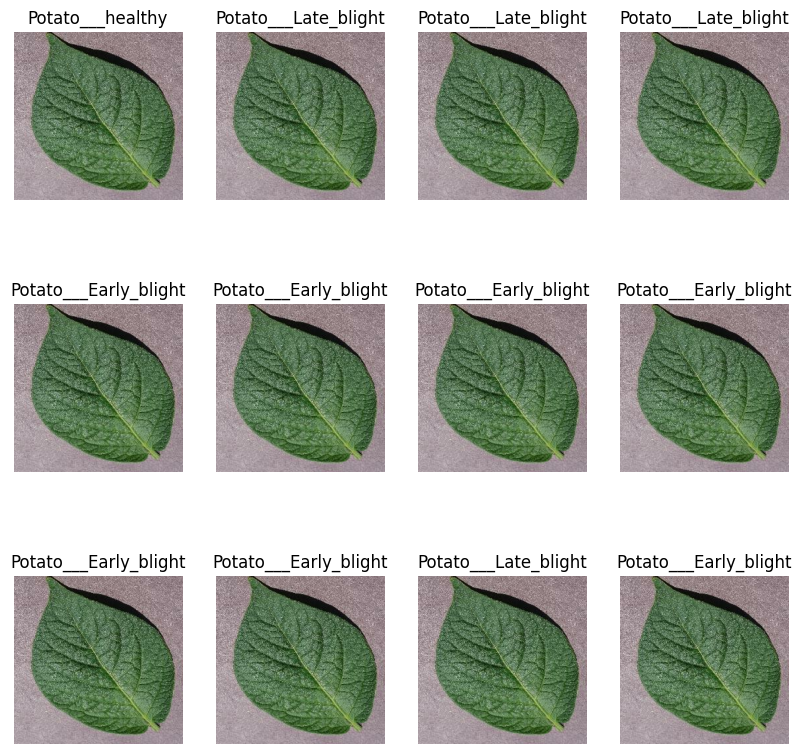

In [9]:
plt.figure(figsize=(10,10))
#to properly see the image
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[0].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [10]:
len(dataset) #this is actually 68*32 as we divided each batch into 32 images, so there are 68 batches and total of 68*32 imgs

68

In [11]:
#splitting the data now, instead of train test split we'll use take
train_size=0.8
train_size*len(dataset) #so 54 of the batches will be used for training, rest for validatoin and testing

54.400000000000006

In [12]:
train_ds=dataset.take(54)
len(train_ds)

54

In [13]:
test_ds=dataset.skip(54)
len(test_ds)

14

In [14]:
val_size=0.1
val_size*len(dataset)

6.800000000000001

In [15]:
val_ds=test_ds.take(6)

In [16]:
test_ds=test_ds.skip(6)
len(test_ds)

8

In [17]:
#doing the same thing but in one functoin
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,shuffle=True,shuffle_size=10000):
        ds_size=len(ds)
        if shuffle:
            ds=ds.shuffle(shuffle_size,seed=12)
        train_size=int(train_split*ds_size)
        val_size=int(val_split*ds_size)
    
        train_ds=ds.take(train_size)
    
        val_ds=ds.skip(train_size).take(val_size)
        test_ds=ds.skip(train_size).take(val_size)    
        
        return train_ds,val_ds,test_ds

In [18]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset)

In [19]:
len(train_ds)

54

In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

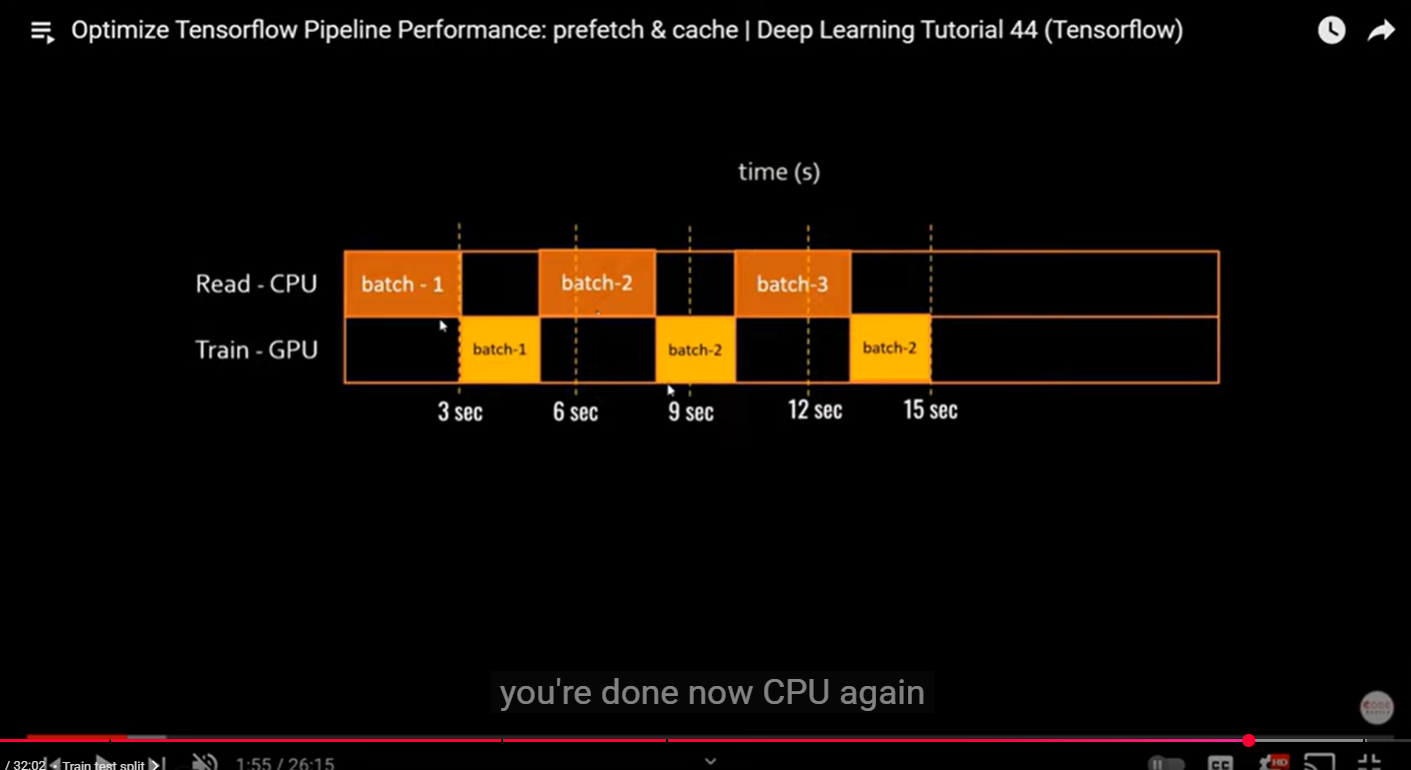

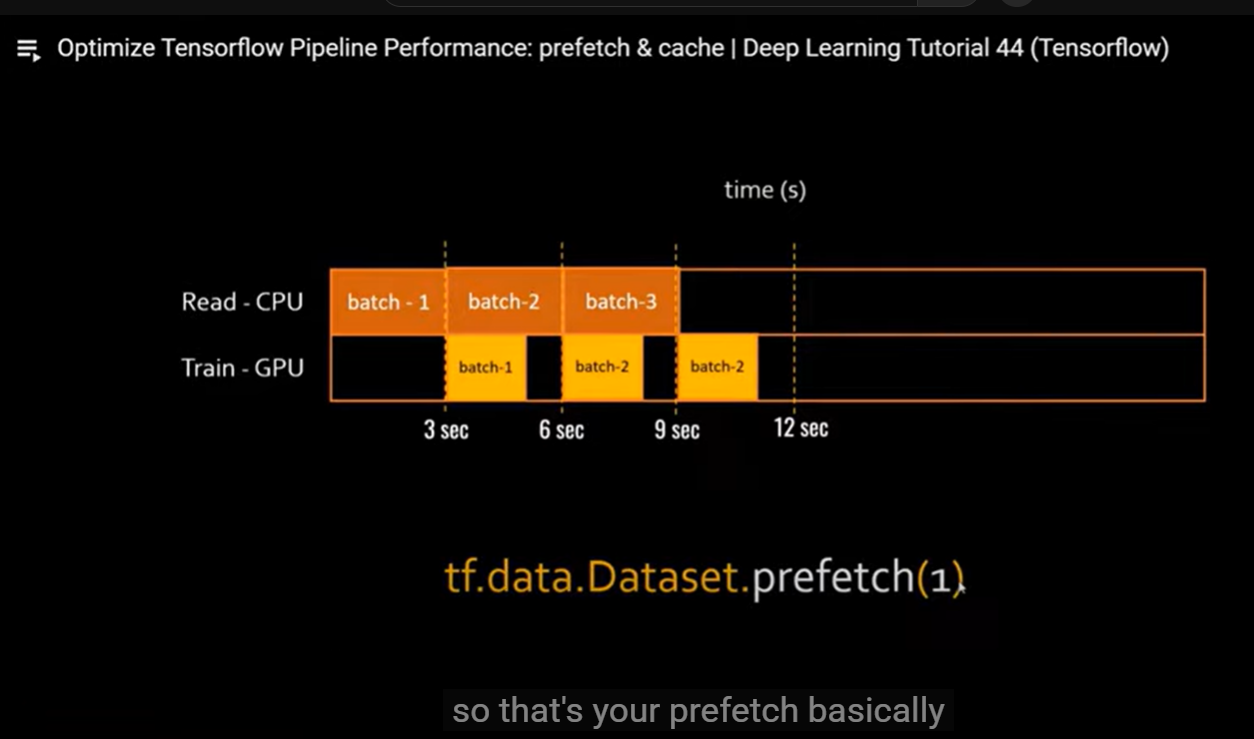

In [21]:
#scaling the images which is nothing but data augmentatoin
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])
#This prepares your images for input into the model.

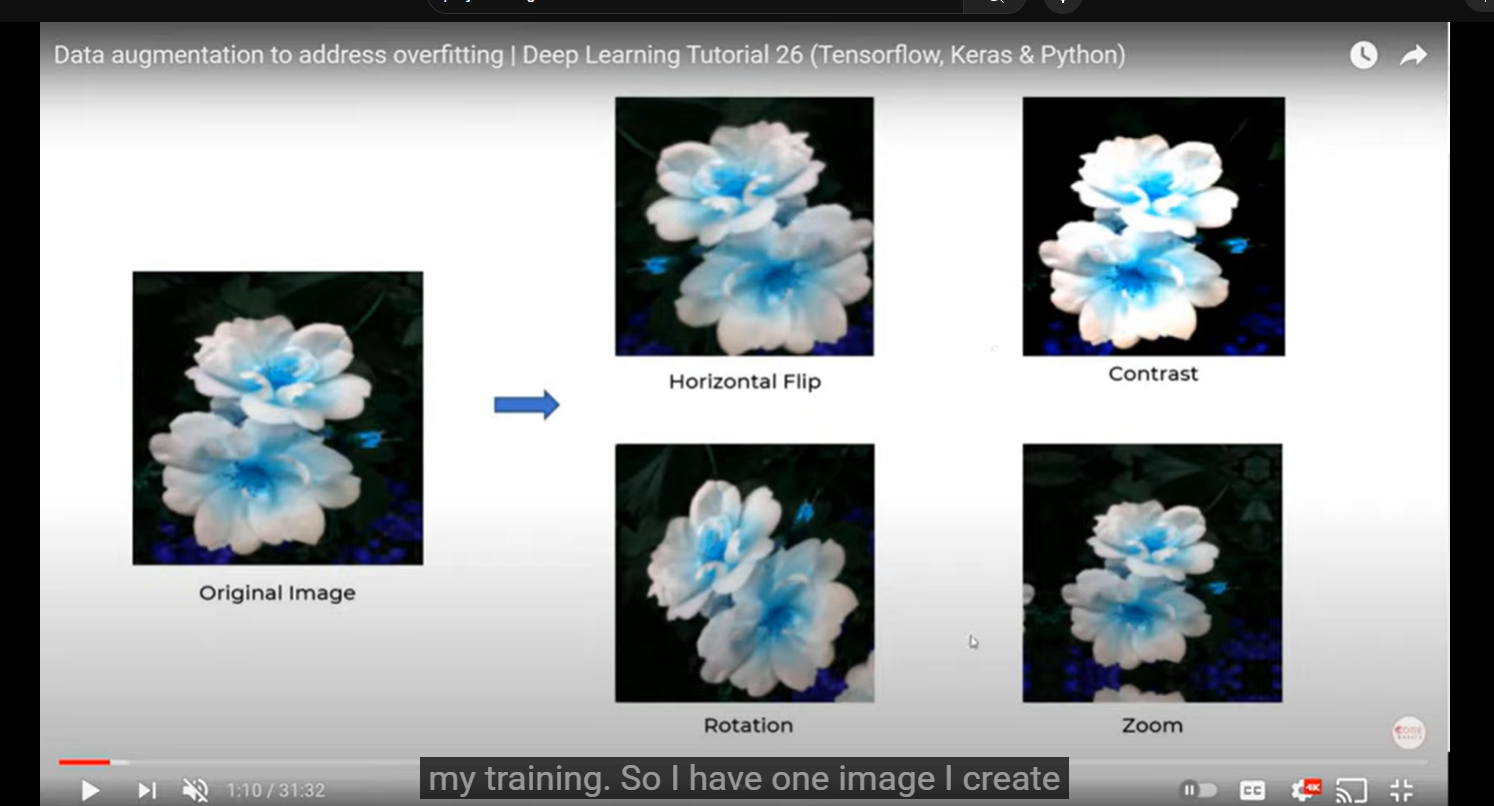

In [22]:
 data_augmentation=tf.keras.Sequential([
     layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
     layers.experimental.preprocessing.RandomRotation(0.2)
     
 ])
#This applies random transformations to each image during training only, helping your model generalize better.

In [23]:
#check this in detail
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes=3
model=models.Sequential([
     resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/10


54/54 [==============================] - 42s 641ms/step - loss: 0.8741 - accuracy: 0.5353 - val_loss: 0.8142 - val_accuracy: 0.6302
Epoch 2/10
54/54 [==============================] - 28s 518ms/step - loss: 0.5959 - accuracy: 0.7552 - val_loss: 0.5835 - val_accuracy: 0.7656
Epoch 3/10
54/54 [==============================] - 27s 505ms/step - loss: 0.3817 - accuracy: 0.8368 - val_loss: 0.4908 - val_accuracy: 0.8125
Epoch 4/10
54/54 [==============================] - 27s 502ms/step - loss: 0.3068 - accuracy: 0.8837 - val_loss: 0.2287 - val_accuracy: 0.9115
Epoch 5/10
54/54 [==============================] - 27s 495ms/step - loss: 0.2386 - accuracy: 0.9103 - val_loss: 0.1732 - val_accuracy: 0.9219
Epoch 6/10
54/54 [==============================] - 27s 505ms/step - loss: 0.1804 - accuracy: 0.9387 - val_loss: 0.2510 - val_accuracy: 0.8958
Epoch 7/10
54/54 [==============================] - 28s 512ms/step - loss: 0.2657 - accuracy: 0.8924 - val_loss: 0.2263 - val_accuracy: 0.89

In [27]:
scores=model.evaluate(test_ds)

6/6 [==============================] - 2s 165ms/step - loss: 0.1450 - accuracy: 0.9427


In [28]:
scores

[0.14504216611385345, 0.9427083134651184]

In [29]:
history

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)
class_names=dataset.class_names # these are the folder names
class_names
len(dataset)
#each batch has 32 images, hence 32, 256x256 is img size, and 3 is for rgb, and in second one we convert tensor to numpy
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
#in the end what that is is a 32 numbers saying what type each leaf is in that batch, so 0->black rot, 1-> healthy like that according to the dir
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0]) #Printing only the first image
#converting tensor to numpy
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)
    pri

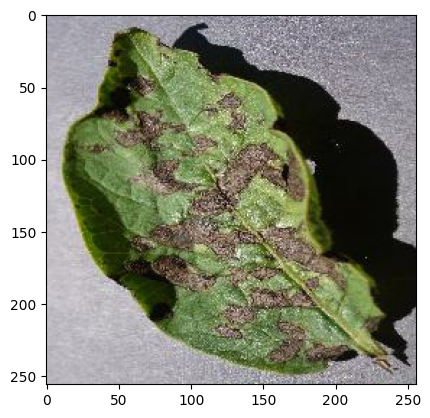

In [30]:
for images_batch,labes_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))

First image to predict
Actual label: Potato___healthy
1/1 [==============================] - 1s 543ms/step
Predicted label: Potato___healthy


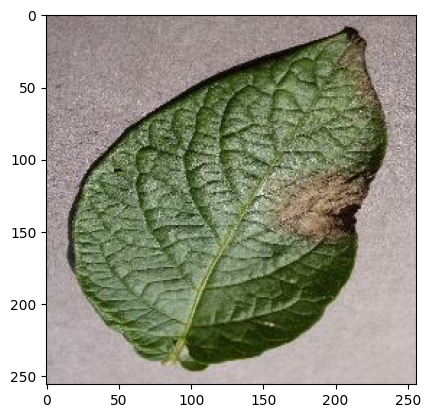

In [31]:
import numpy as np
for images_batch,labes_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=label_batch[0].numpy()

    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:",class_names[first_label])

    batch_prediction=model.predict(image_batch) 
    print("Predicted label:",class_names[np.argmax(batch_prediction[0])])

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 36ms/step


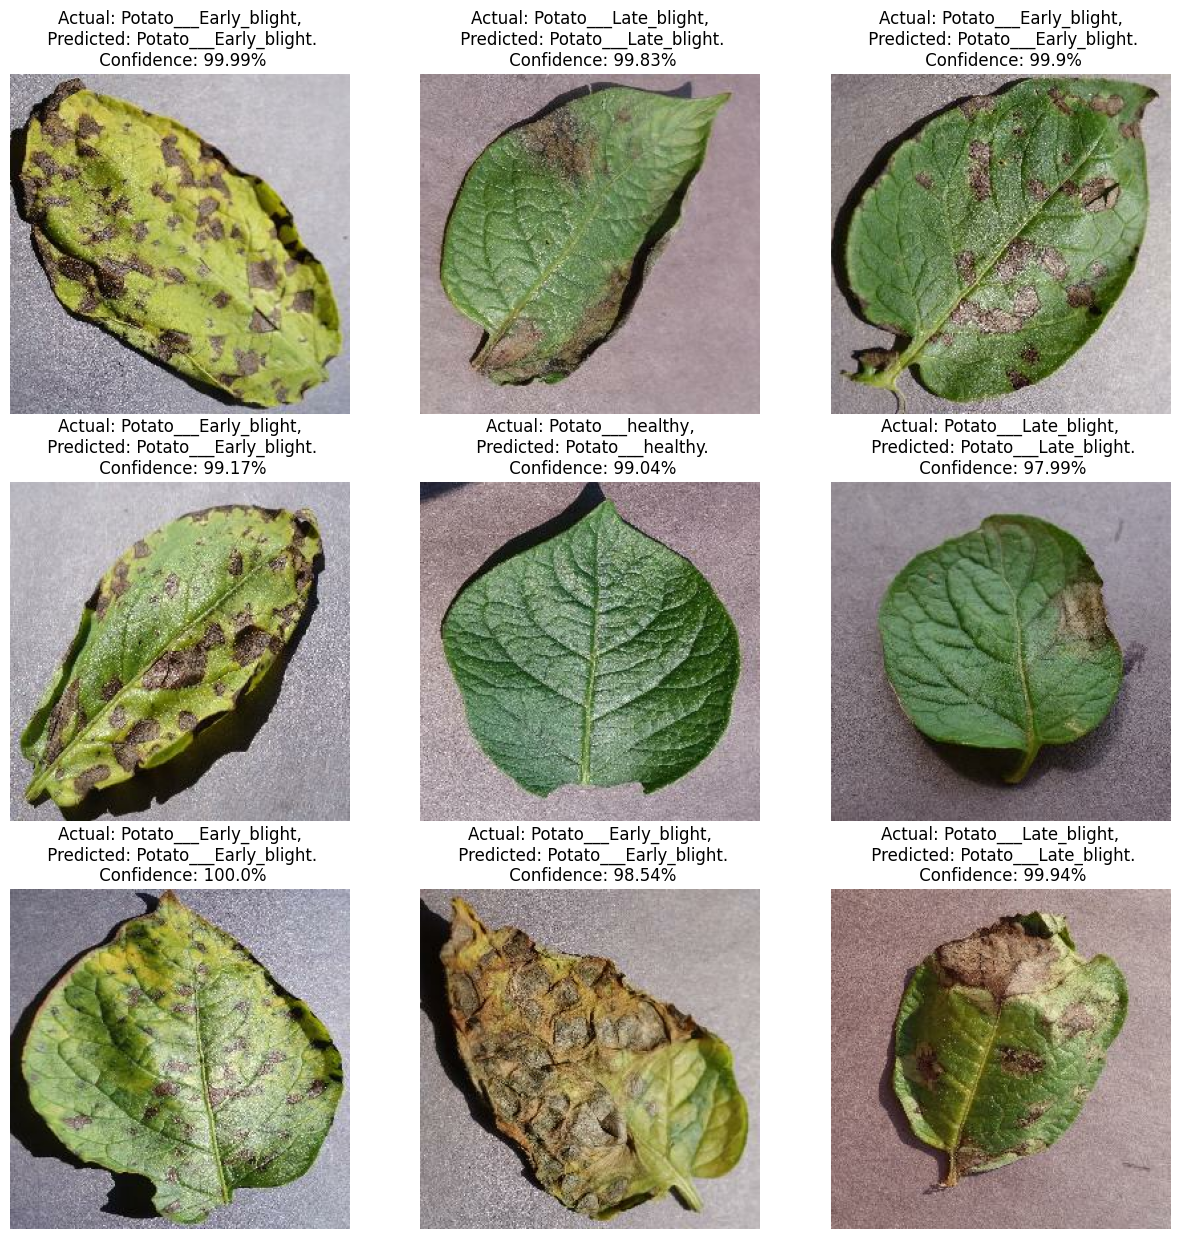

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [34]:
model_version=2
model.save(f"../models/{model_version}")

INFO:tensorflow:Assets written to: ../models/2\assets


INFO:tensorflow:Assets written to: ../models/2\assets
